# Set up libraries and data

In [1]:
#Import libraries
import sklearn
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns; sns.set()

In [2]:
#Import data
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
fetch_housing_data()
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [3]:
housing = load_housing_data()
#Remove / add hash sign as desired to view various aspects
#housing.head()
#housing.info()
#housing["ocean_proximity"].value_counts()
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
#Add new features by calculating them from existing features
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
housing.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,0.224625,2.560606
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,0.215208,3.122807
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,0.215173,2.325635
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,0.219892,2.123209
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND,5.254717,0.221185,2.616981


In [5]:
#Use SimpleImputer. Remove text attribute of the column for imputing
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
#Fit Imputer and apply to dataset
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
housing_tr.loc[sample_incomplete_rows.index.values]
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


In [6]:
#Encode the categorical column Ocean Proximity
housing_cat = housing[["ocean_proximity"]]
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
enc_names = cat_encoder.get_feature_names_out()
housing_cat_1hot_df = pd.DataFrame(housing_cat_1hot.todense(), columns = enc_names)
housing_tr = pd.merge(housing, housing_cat_1hot_df, left_index=True, right_index=True)
housing_tr.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556,0.0,0.0,0.0,1.0,0.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842,0.0,0.0,0.0,1.0,0.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260,0.0,0.0,0.0,1.0,0.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945,0.0,0.0,0.0,1.0,0.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467,0.0,0.0,0.0,1.0,0.0


In [7]:
housing_viz = housing_tr.convert_dtypes()
housing_viz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  Float64
 1   latitude                    20640 non-null  Float64
 2   housing_median_age          20640 non-null  Int64  
 3   total_rooms                 20640 non-null  Int64  
 4   total_bedrooms              20433 non-null  Int64  
 5   population                  20640 non-null  Int64  
 6   households                  20640 non-null  Int64  
 7   median_income               20640 non-null  Float64
 8   median_house_value          20640 non-null  Int64  
 9   ocean_proximity             20640 non-null  string 
 10  rooms_per_household         20640 non-null  Float64
 11  bedrooms_per_room           20433 non-null  Float64
 12  population_per_household    20640 non-null  Float64
 13  ocean_proximity_<1H OCEAN   206

# Basic plotting concepts

<class 'matplotlib.figure.Figure'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


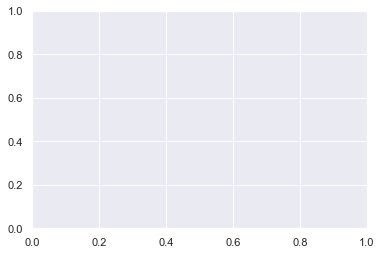

In [8]:
#Create a blank plot
fig, ax = plt.subplots()
print(type(fig))
print(type(ax))

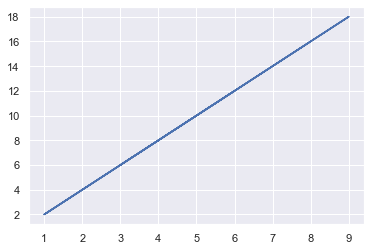

In [9]:
#Plot y = 2^x
fig, ax = plt.subplots()
x = np.random.randint(1,10, size=10)
y = 2*x 
plt.plot(x,y) # same as ax.plot(x,y)
plt.show()

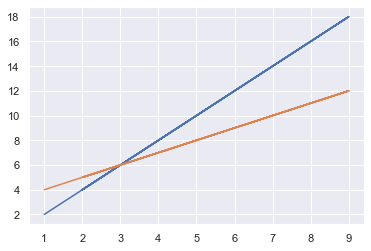

In [10]:
# Multiple lines
fig, ax = plt.subplots()
x = np.random.randint(1,10, size=10)
y = 2*x 
plt.plot(x,y)
plt.plot(x,x+3)
plt.show()

C:\Users\hruss\AppData\Local\Temp/ipykernel_7532/2467539289.py:14: RuntimeWarning: divide by zero encountered in log
  plt.plot(x, np.log(x), color='0.75',linestyle='-.')


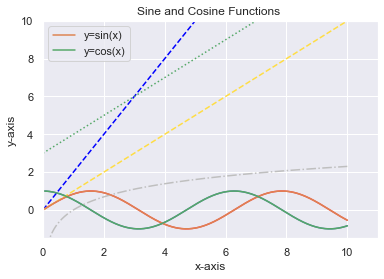

In [11]:
#Various arguments for plt.plot (np is numpy, plt is matplotlib)
fig, ax = plt.subplots()
x = np.linspace(0,10,1000)
y = 2*x
# set of default color and style
plt.plot(x, np.cos(x))
# RGB tuple, values 0 to 1, solid style
plt.plot(x, np.sin(x), color=(1.0,0.2,0.3),linestyle='-')
# specify color by name, dashed style
plt.plot(x, y, color='blue', linestyle='--')
# short color code (rgbcmyk), dotted style   
plt.plot(x, x+3, color='g',linestyle=':')
# Grayscale between 0 and 1, dashdot style    
plt.plot(x, np.log(x), color='0.75',linestyle='-.')
# Hex code (RRGGBB from 00 to FF), dashed style  
plt.plot(x, x, color='#FFDD44',linestyle='--')
plt.xlim(0, 11)
plt.ylim(-1.5, 10)
plt.plot(x, np.sin(x), label='y=sin(x)')
plt.plot(x,np.cos(x), label='y=cos(x)')
plt.title('Sine and Cosine Functions ')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend() 
plt.show()

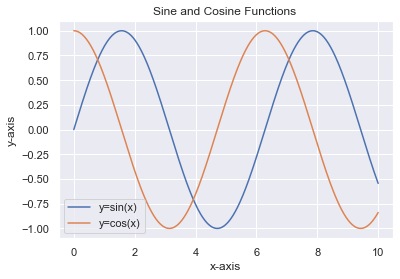

In [13]:
plt.plot(x, np.sin(x), label='y=sin(x)')
plt.plot(x,np.cos(x), label='y=cos(x)')
plt.title('Sine and Cosine Functions ')
plt.xlabel("x-axis")
plt.ylabel("y-axis")
plt.legend() # Describing the element of the graph
plt.show()

# Correlations, Relations, Comparisons, Trends, Cycles

Questions:  
What’s the best? What’s the worst? Compared to what?  
Who’s ranked the highest? The lowest?  
How does performance compare to the target or goal? For example, did total sales exceed forecast
Is the relationship positive, negative, or neither?  
How are x and y related to each other?  
What makes one group or cluster different from another? 
What changed today from yesterday?  
How does time of year affect sales, results, outcomes, etc.?  
What times are the most popular? Least popular? 

Plot types:
[Vertical / horizontal bar chart, bullet chart, line chart, sparklines, stream graph, scatter plot/matrix, bubble, parallel coordinates, radar, heatmap]

In [30]:
for x in housing_tr.index:
    if housing_tr.loc[x, "rooms_per_household"] > 10:
        housing_tr.loc[x, "rooms_per_household"] = 10
    if housing_tr.loc[x, "population_per_household"] > 10:
        housing_tr.loc[x, "population_per_household"] = 10
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,Age,Cholesterol
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,37.0,226.0
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,5.326848,0.213039,2.931212,0.442636,0.317393,0.000242,0.110950,0.128779,10.0,10.0
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,1.316339,0.057983,0.821141,0.496710,0.465473,0.015563,0.314077,0.334963,0.0,0.0
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,0.846154,0.100000,0.692308,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,10.0
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,4.440716,0.175427,2.429741,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,10.0
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,5.229129,0.203162,2.818116,0.000000,0.000000,0.000000,0.000000,0.000000,10.0,10.0
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,6.052381,0.239821,3.282261,1.000000,1.000000,0.000000,0.000000,0.000000,10.0,10.0
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000,10.000000,1.000000,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.0,10.0


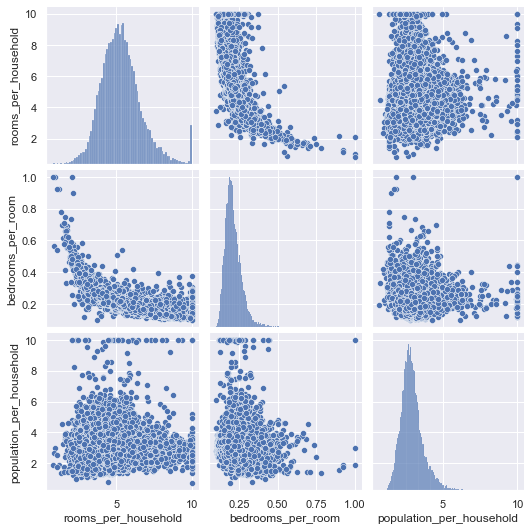

In [31]:
#How are x and y related to each other?
#What are the distributions of each variable?
#Plot scatter matrix (Semicolon used to suppress text array)

attributes = ["rooms_per_household", "bedrooms_per_room", "population_per_household"]
sns.pairplot (housing_tr[attributes]);

In [ ]:
MATPLOTLIB
price = Series(randn(150).cumsum(), index=date_range('2000-1-1', periods=150, freq='B'))
ma = pd.rolling_mean(price, 20)
mstd = pd.rolling_std(price, 20)
plt.figure()
plt.plot(price.index, price, 'k')
plt.plot(ma.index, ma, 'b')
plt.fill_between(mstd.index, ma-2*mstd, ma+2*mstd, color='b', alpha=0.2)


In [ ]:

import pandas.tools.rplot as rplot
plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomHistogram())
plot.render(plt.gcf())


In [ ]:

plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomDensity())
plot.render(plt.gcf())


In [ ]:

plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomScatter())
plot.add(rplot.GeomPolyFit(degree=2))
plot.render(plt.gcf())


In [ ]:

plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomScatter())
plot.add(rplot.GeomDensity2D())
plot.render(plt.gcf())


In [ ]:

plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['sex', '.']))
plot.add(rplot.GeomHistogram())
plot.render(plt.gcf())


In [ ]:

plt.figure()
plot = rplot.RPlot(tips_data, x='total_bill', y='tip')
plot.add(rplot.TrellisGrid(['.', 'smoker']))
plot.add(rplot.GeomHistogram())
plot = rplot.RPlot(tips_data, x='tip', y='total_bill')
plot.add(rplot.TrellisGrid(['sex', 'smoker']))
plot.add(rplot.GeomPoint(size=80.0, colour=rplot.ScaleRandomColour('day'), shape=rplot.ScaleShape('size'), alpha=1.0))
plot.render(plt.gcf())

In [ ]:
SUBPLOTS
df.plot(subplots=True, figsize=(6, 6));


In [ ]:

fig, axes = plt.subplots(4, 4, figsize=(6, 6));
plt.subplots_adjust(wspace=0.5, hspace=0.5);
target1 = [axes[0][0], axes[1][1], axes[2][2], axes[3][3]]
target2 = [axes[3][0], axes[2][1], axes[1][2], axes[0][3]]
df.plot(subplots=True, ax=target1, legend=False);
(-df).plot(subplots=True, ax=target2, legend=False);


In [ ]:

fig, axes = plt.subplots(nrows=2, ncols=2)
df['A'].plot(ax=axes[0,0]); axes[0,0].set_title('A');
df['B'].plot(ax=axes[0,1]); axes[0,1].set_title('B');
df['C'].plot(ax=axes[1,0]); axes[1,0].set_title('C');
df['D'].plot(ax=axes[1,1]); axes[1,1].set_title('D');


In [ ]:

dd = DataFrame(randn(10, 10)).applymap(abs)
dd = dd.cumsum()
plt.figure()
dd.plot(kind='bar', colormap='Greens')


BAR PLOT
In [11]: plt.figure();
In [12]: df.ix[5].plot(kind='bar'); plt.axhline(0, color='k')

In [13]: df2 = DataFrame(rand(10, 4), columns=['a', 'b', 'c', 'd'])
In [14]: df2.plot(kind='bar');

In [15]: df2.plot(kind='bar', stacked=True);

In [16]: df2.plot(kind='barh', stacked=True);


SCATTER
In [61]: df.plot(kind='scatter', x='a', y='b', s=df['c']*200);

Multiple line plot
In [5]: df = DataFrame(randn(1000, 4), index=ts.index, columns=list('ABCD'))

In [6]: df = df.cumsum()

In [7]: plt.figure(); df.plot();

In [ ]:
corr = housing_tr.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
corr[mask] = np.nan
(corr
 .style
 .background_gradient(cmap='PuOr_r', axis=None, vmin=-1, vmax=1)
 .highlight_null(null_color='#f1f1f1')  # Color NaNs grey
 .set_precision(2))

# Distribution, Part to Whole, Frequency

Questions:  
What are the highest, middle, and lowest values?  
Does one thing stand out from the rest?  
What does the shape of the data look like?
What are the parts that make up the whole?  
What part is the largest or smallest?  
What parts are similar or dissimilar? 


Plot types: [Pie, stacked bar, donut, stacked area, treemap, histogram, density plot, boxplot]

AUTOCORRELATION (SB ZERO, LINES ARE CONFIDENCE INTERVALS)
In [95]: from pandas.tools.plotting import autocorrelation_plot
In [96]: plt.figure()
In [97]: data = Series(0.7 * rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
In [98]: autocorrelation_plot(data)

PIE
In [73]: series.plot(kind='pie', labels=['AA', 'BB', 'CC', 'DD'], colors=['r', 'g', 'b', 'c'], autopct='%.2f', fontsize=20, figsize=(6, 6))

In [74]: series = Series([0.1] * 4, index=['a', 'b', 'c', 'd'], name='series2')
In [75]: series.plot(kind='pie', figsize=(6, 6))

In [ ]:
BOXPLOT
In [152]: df = pd.DataFrame(
   .....:      {u'stratifying_var': np.random.uniform(0, 100, 20),
   .....:       u'price': np.random.normal(100, 5, 20)})


In [ ]:

In [153]: df[u'quartiles'] = pd.qcut(
   .....:     df[u'stratifying_var'],
   .....:     4,
   .....:     labels=[u'0-25%', u'25-50%', u'50-75%', u'75-100%'])


In [ ]:

In [154]: df.boxplot(column=u'price', by=u'quartiles')
In [32]: color = dict(boxes='DarkGreen', whiskers='DarkOrange',
   ....:              medians='DarkBlue', caps='Gray')


In [ ]:

In [33]: df.plot(kind='box', color=color, sym='r+')


In [ ]:

In [34]: df.plot(kind='box', vert=False, positions=[1, 4, 5, 6, 8])


In [ ]:

In [38]: df = DataFrame(rand(10,2), columns=['Col1', 'Col2'] )
In [39]: df['X'] = Series(['A','A','A','A','A','B','B','B','B','B'])
In [40]: plt.figure();
In [41]: bp = df.boxplot(by='X')


In [ ]:

In [42]: df = DataFrame(rand(10,3), columns=['Col1', 'Col2', 'Col3'])
In [43]: df['X'] = Series(['A','A','A','A','A','B','B','B','B','B'])
In [44]: df['Y'] = Series(['A','B','A','B','A','B','A','B','A','B'])
In [45]: plt.figure();
In [46]: bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

In [ ]:
HISTOGRAM
In [17]: df4 = DataFrame({'a': randn(1000) + 1, 'b': randn(1000),
   ....:                  'c': randn(1000) - 1}, columns=['a', 'b', 'c'])
In [18]: plt.figure();
In [19]: df4.plot(kind='hist', alpha=0.5)


In [ ]:

In [20]: plt.figure();
In [21]: df4.plot(kind='hist', stacked=True, bins=20)


In [ ]:

In [22]: plt.figure();
In [23]: df4['a'].plot(kind='hist', orientation='horizontal', cumulative=True)


In [ ]:

In [24]: plt.figure();
In [25]: df['A'].diff().hist()


In [ ]:

In [26]: plt.figure()
In [27]: df.diff().hist(color='k', alpha=0.5, bins=50)

In [ ]:

In [20]: plt.figure();
In [21]: df4.plot(kind='hist', stacked=True, bins=20)


In [ ]:

In [22]: plt.figure();
In [23]: df4['a'].plot(kind='hist', orientation='horizontal', cumulative=True)


In [ ]:

In [24]: plt.figure();
In [25]: df['A'].diff().hist()


In [ ]:

In [26]: plt.figure()
In [27]: df.diff().hist(color='k', alpha=0.5, bins=50)

In [ ]:
#View histogram of all numerical data
%matplotlib inline
import matplotlib.pyplot as plt
housing_tr.hist(bins=50, figsize=(20,15))
plt.show()

# Geospatial Location, Comparison, Trends

Questions:  
Where can the most or least be found?  
How does one area compare to another?  
What is the distance from one place to another?  4. How does a variable change by location? 


Plot types: [Chloropeth, heatmap, point, symbol, line map, sparkline, streamgraph]

In [ ]:
#View scatter plot of data based on latitude / longitude, on image of California
import matplotlib.image as mpimg
california_img=mpimg.imread('C:/Users/hruss/Desktop/OneDriveDocs/OneDrive/Documents/GMU/CDS-303/Spring 2022/CDS303/handson-ml2/images/end_to_end_project/california.png')
ax = housing_tr.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing_tr['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)
prices = housing_tr["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)
plt.legend(fontsize=16)
plt.show()

# Qualitative and Conceptual, Sentiment, Connections, Interaction, Centrality

Questions:  
How many times does a given word or phrase appear?  
What words or phrases appear most often? Least often?  
What words appear together?  
Are most words or phrases positive or negative? 
Who is closest to whom? Who is connected to whom?  
Who is the most popular? Who is the least?  
What communities exist and who are their members?  
What is the strength of the relationship between two entities? 


Plot types: [Word cloud, proportional area chart using size bubbles or squares, histogram]